In [11]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import seaborn as sns

In [12]:
random_seed = 42
np.random.seed(random_seed)

In [13]:
data_path = Path.cwd()
data_dir = data_path/'data/'
class_names = sorted(os.listdir(data_dir))
class_distribution = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names}
print(class_names)

['Ant', 'Bear', 'Bee']


### Distribution of classes

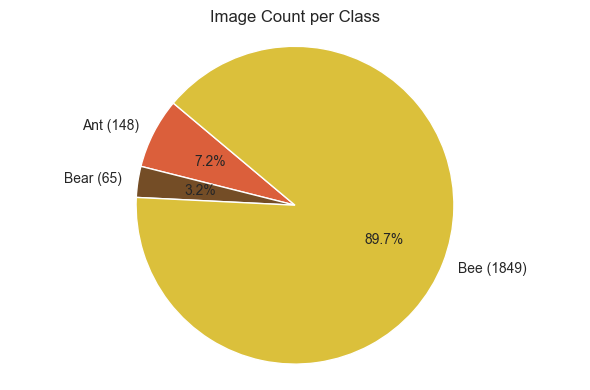

In [14]:
labels = list(class_distribution.keys())
sizes = list(class_distribution.values())

colors = ['#DB5F3B', '#744d26', '#DBC03B']

plt.figure(figsize=(6, 4))
plt.pie(
    sizes,
    labels=[f"{label} ({count})" for label, count in zip(labels, sizes)],
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title("Image Count per Class")
plt.axis('equal')
plt.tight_layout()
plt.show()

There is a vast imbalance in the dataset. The class 'Bee' makes up around 90% of the dataset, while 'Ant' and 'Bear' are significantly underrepresented. This imbalance can lead to a model that is biased towards the majority class. Overall the dataset consist of 2065 images, which is a manageable size for training the model.

### Image Size Distribution

C:\Users\lodu\AppData\Local\Temp\ipykernel_6052\3923720886.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Area', data=df, palette=colors)


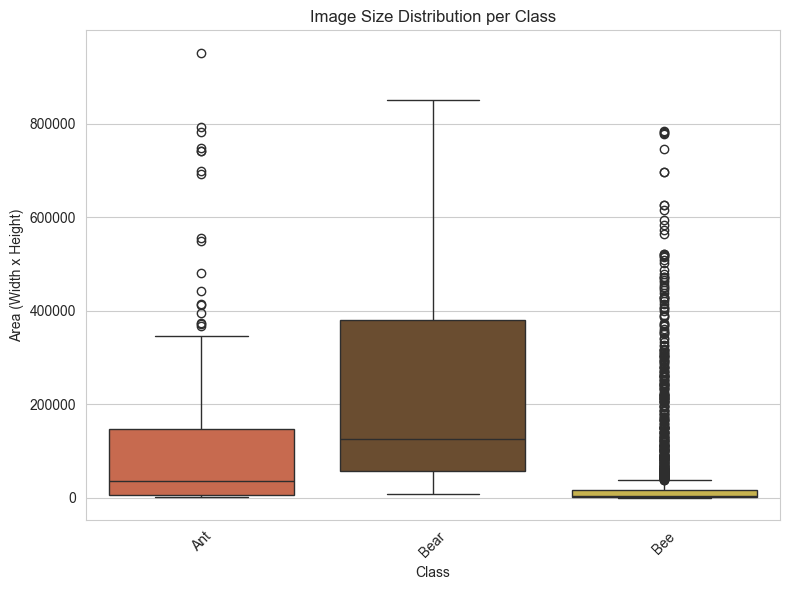

In [15]:
def get_image_sizes(data_dir):
    image_sizes = []
    for cls in os.listdir(data_dir):
        cls_dir = os.path.join(data_dir, cls)
        for img_file in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_file)
            if img_file.endswith(('.jpg', '.png', '.jpeg')):
                img = cv2.imread(img_path)
                if img is not None:
                    height, width, _ = img.shape
                    image_sizes.append((cls, width, height))
    return image_sizes

image_sizes = get_image_sizes(data_dir)
df = pd.DataFrame(image_sizes, columns=['Class', 'Width', 'Height'])
df['Area'] = df['Width'] * df['Height']

plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Area', data=df, palette=colors)
plt.title('Image Size Distribution per Class')
plt.xlabel('Class')
plt.ylabel('Area (Width x Height)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bear images have a wider range than in image size and are generally larger than the other classes. The 'Ant' class also shows a wider range of image sizes and the images of 'Bee' class are generally smaller but have a lot of outliers as well. This is due to the fact that 'Bee' images are mostly close-up shots, while 'Ant' and 'Bear' images are more diverse in terms of distance and angle. This could be a potential issue for the model, as it may not generalize well to images of different sizes and differences in level of detail.

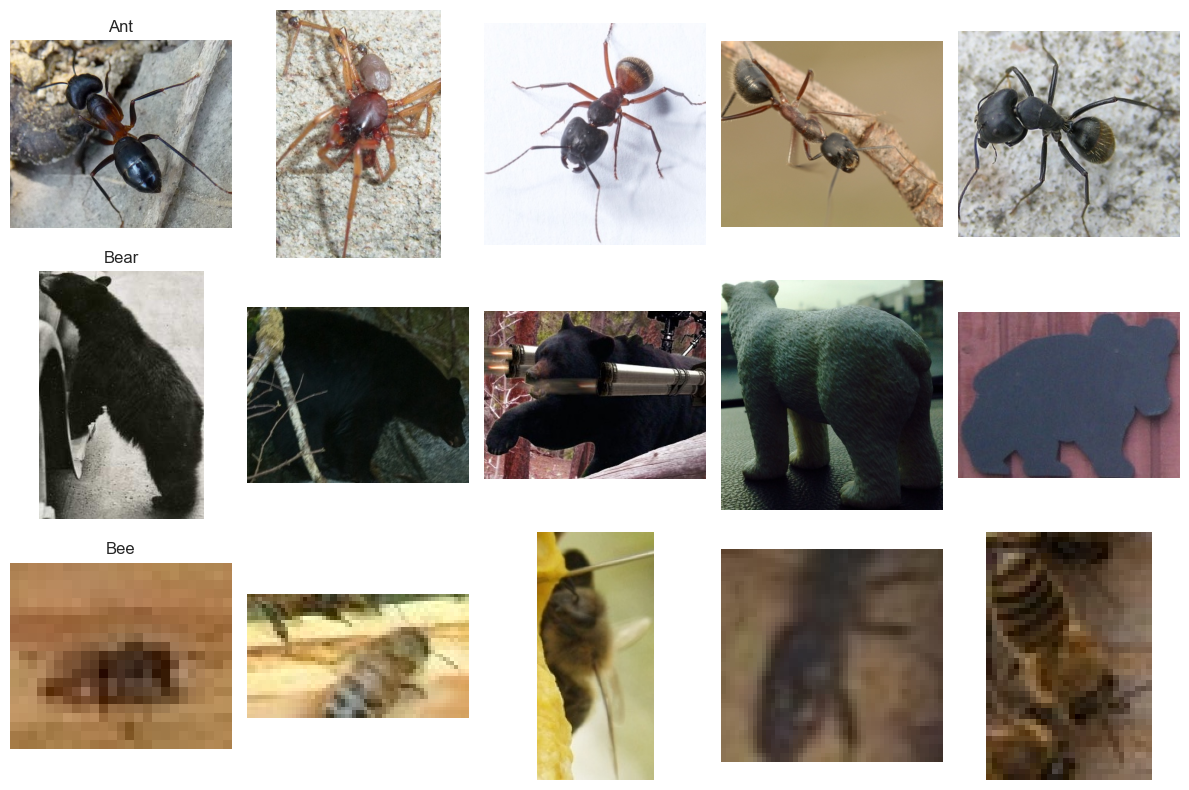

In [16]:
def show_random_images(data_dir, class_names, n=3):
    plt.figure(figsize=(12, 8))
    for i, cls in enumerate(class_names):
        cls_dir = os.path.join(data_dir, cls)
        img_files = [f for f in os.listdir(cls_dir)]
        random_imgs = np.random.choice(img_files, size=n, replace=False)

        for j, img_file in enumerate(random_imgs):
            img_path = os.path.join(cls_dir, img_file)
            img = cv2.imread(img_path)
            ax = plt.subplot(len(class_names), n, i * n + j + 1)
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax.axis('off')
            if j == 0:
                ax.set_title(cls)
    plt.tight_layout()
    plt.show()

show_random_images(data_dir, class_names, n=5)

In [17]:
def check_image_channels(data_dir):
    for cls in os.listdir(data_dir):
        cls_dir = os.path.join(data_dir, cls)
        for img_file in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                if len(img.shape) != 3 or img.shape[2] != 3:
                    print(f"Image {img_file} in class {cls} is not RGB.")
                    return False
    return True

print(check_image_channels(data_dir))

True


All images have 3 channels (RGB) but some images have colour filter applied to them (e.g. black and white) or are manipulated in some other way, especially images of bears. The pictures of ants seem to be consistent in quality and type, whereas most of the bee images have a very low quality and the model might mistake for them for ant. Since the ant and bear classes are underrepresented, modifications for these pictures could impact the model performance significantly.